In [1]:
cd H:\jupyter_wd

H:\jupyter_wd


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts
import math
from pickle import dump

In [3]:
ford = pd.read_csv('C://Users//HP//used-car-dataset-ford-and-mercedes//ford.csv')

# ford EDA

ford.shape

In [4]:
ford.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [5]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
print(ford.duplicated().sum())

154


In [7]:
ford = ford.drop_duplicates()
ford.shape

(17811, 9)

<AxesSubplot:>

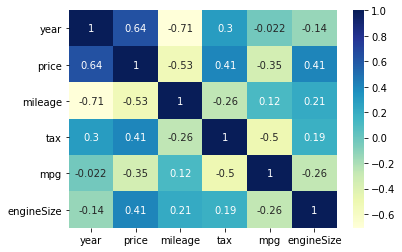

In [8]:
df =ford[['year','price','mileage','tax','mpg','engineSize']]
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

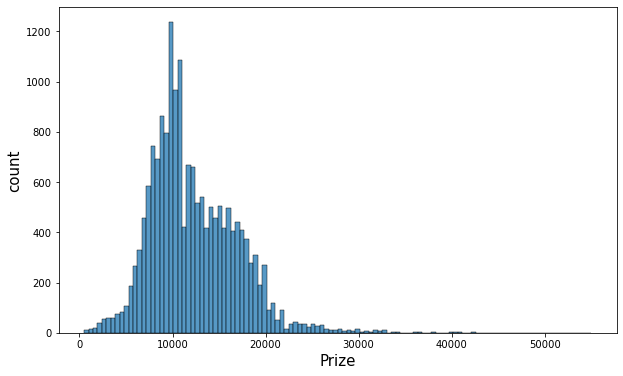

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(ford['price'])
plt.xlabel('Prize',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

Text(0, 0.5, 'count')

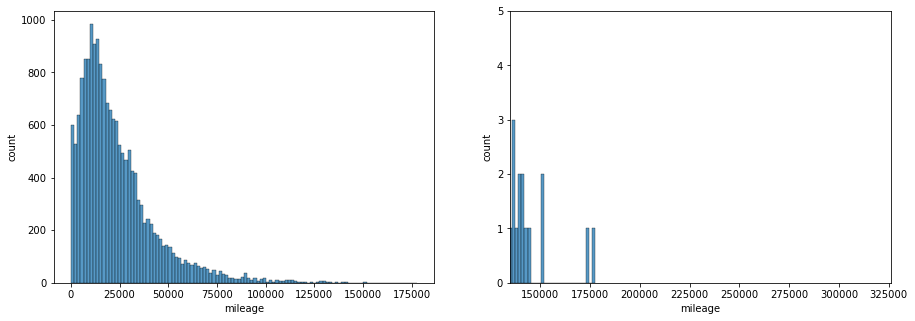

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(ford['mileage'])
plt.xlabel('mileage')
plt.ylabel('count')

plt.subplot(1,2,2)
sns.histplot(ford['mileage'])
plt.xlim(135000,326000)
plt.ylim(0,5)
plt.xlabel('mileage')
plt.ylabel('count')


In [11]:
ford[ford['mileage'] > 160000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16946,Galaxy,2008,3995,Manual,174000,Diesel,220,44.8,1.8
17103,Focus,2003,495,Manual,177644,Petrol,200,41.5,1.6


In [12]:
ford.sort_values('year',axis=0).head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16878,Escort,1996,3000,Manual,50000,Petrol,265,34.4,1.8
13544,Fiesta,1998,2699,Manual,37000,Petrol,160,41.5,1.2
17282,Fiesta,2000,1995,Manual,43000,Petrol,160,41.5,1.3
16899,Puma,2002,2195,Manual,108000,Petrol,230,38.2,1.7
16900,Puma,2002,2695,Manual,69000,Petrol,220,38.7,1.6


In [13]:
ford = ford[ford['mileage'] < 160000]

Text(0, 0.5, 'count')

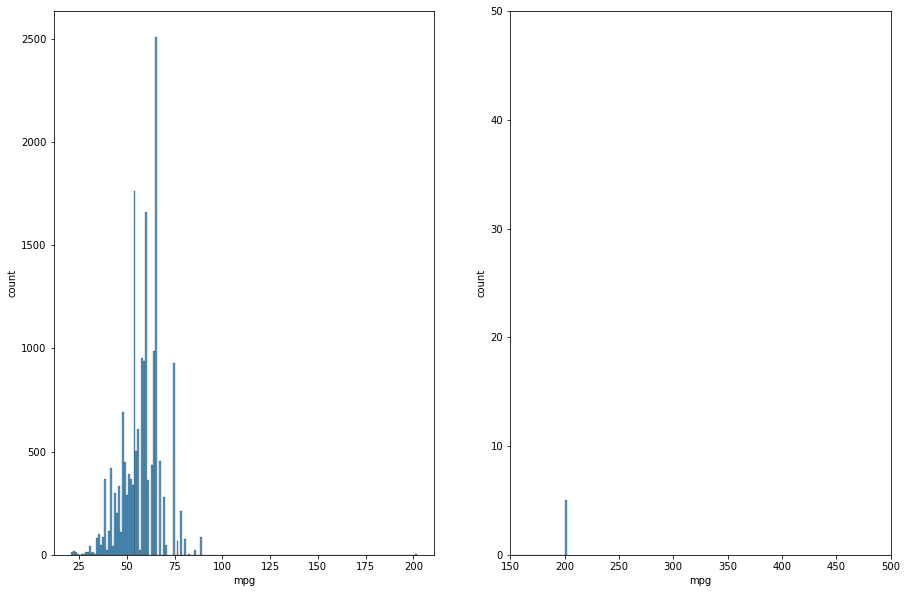

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.histplot(ford['mpg'])
plt.xlabel('mpg')
plt.ylabel('count')

plt.subplot(1,2,2)
sns.histplot(ford['mpg'])
plt.xlim(150,500)
plt.ylim(0,50)
plt.xlabel('mpg')
plt.ylabel('count')

In [15]:
ford[ford['mpg']>100]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6153,Kuga,2020,31000,Semi-Auto,10,Hybrid,135,201.8,2.5
6536,Kuga,2020,31991,Semi-Auto,2357,Hybrid,135,201.8,2.5
9220,Kuga,2020,32000,Automatic,10,Hybrid,140,201.8,2.5
12862,Kuga,2020,33500,Automatic,5534,Hybrid,140,201.8,2.5
13730,Kuga,2020,32995,Automatic,11,Hybrid,135,201.8,2.5


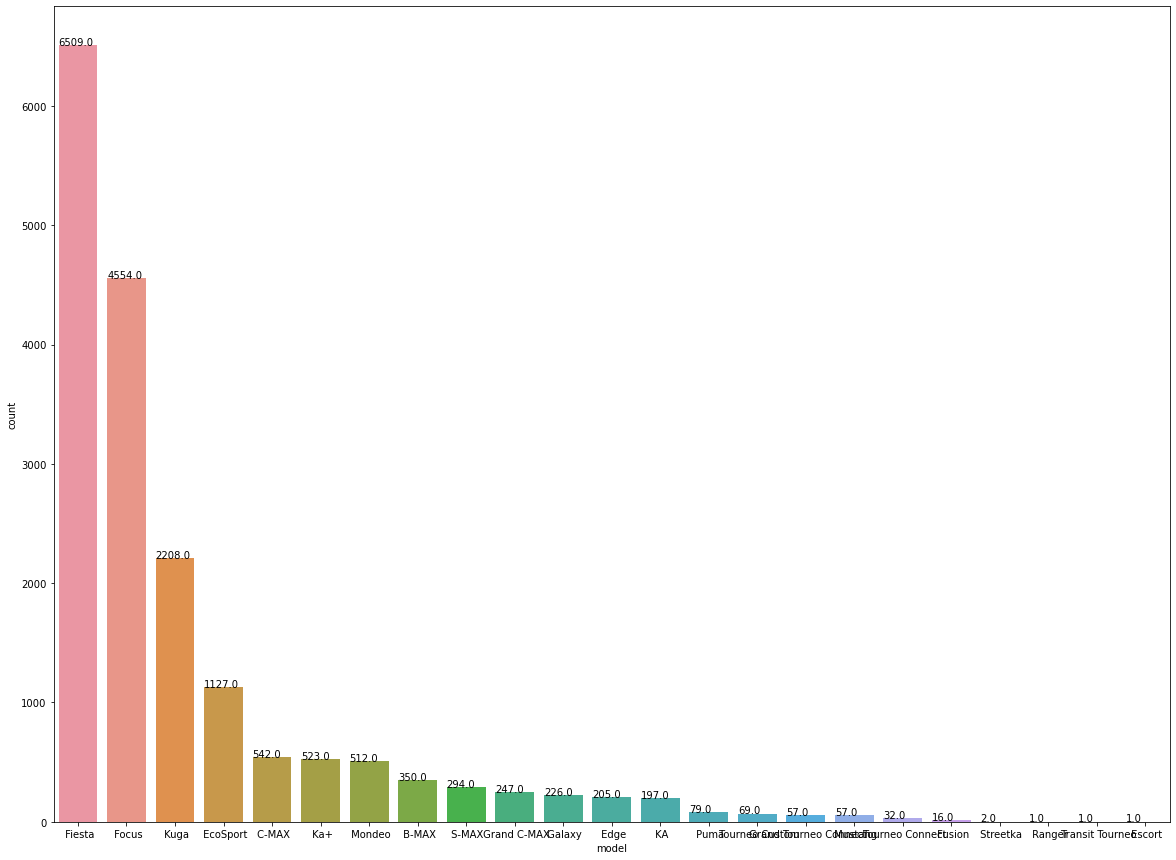

In [16]:
plt.figure(figsize=(20,15))
ax=sns.countplot(x='model', data=ford,order=ford['model'].value_counts().sort_values(ascending=False).index)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.show()

In [17]:
ford.shape

(17809, 9)

In [18]:
ford = ford[(ford['model'] != ' Transit Tourneo') & (ford['model'] != ' Escort') & (ford['model'] != ' Ranger') & (ford['model'] != ' Streetka')]

In [19]:
ford.shape

(17804, 9)

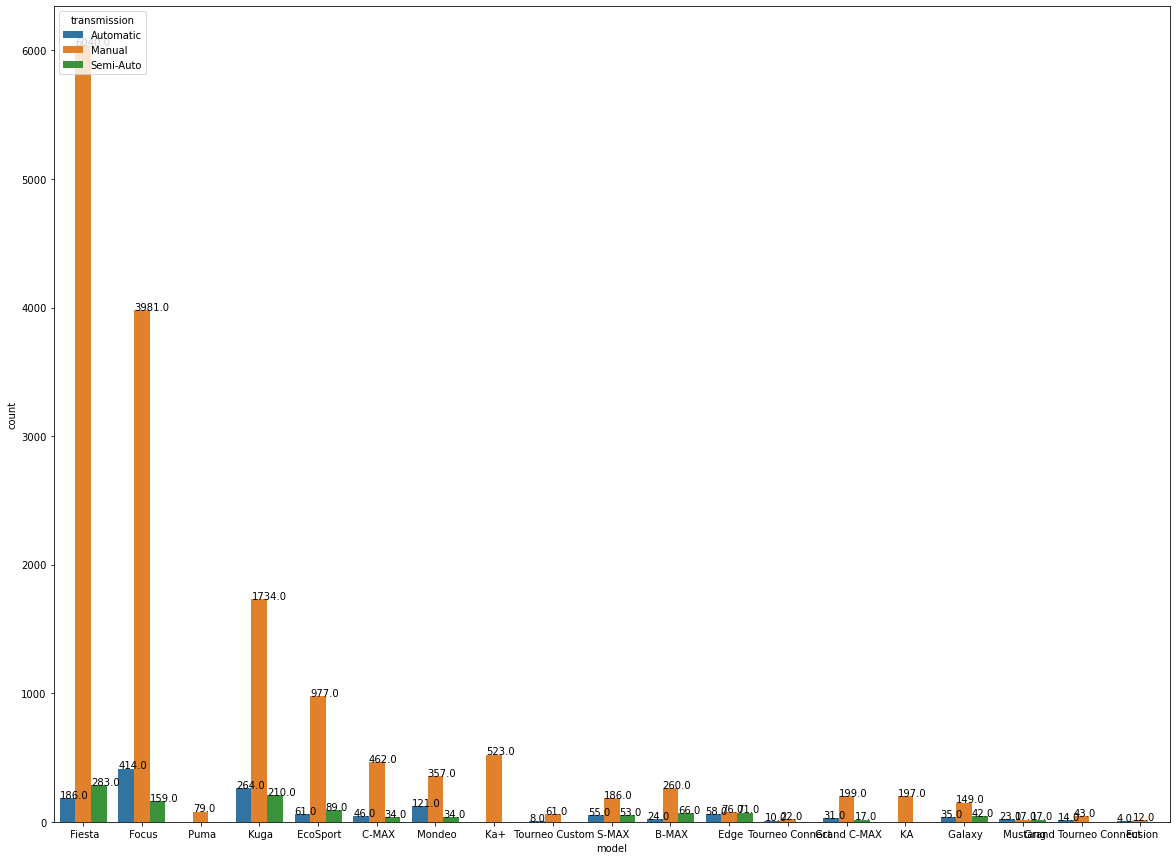

In [20]:
plt.figure(figsize=(20,15))
ax=sns.countplot(x='model', data=ford,hue='transmission')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.show()

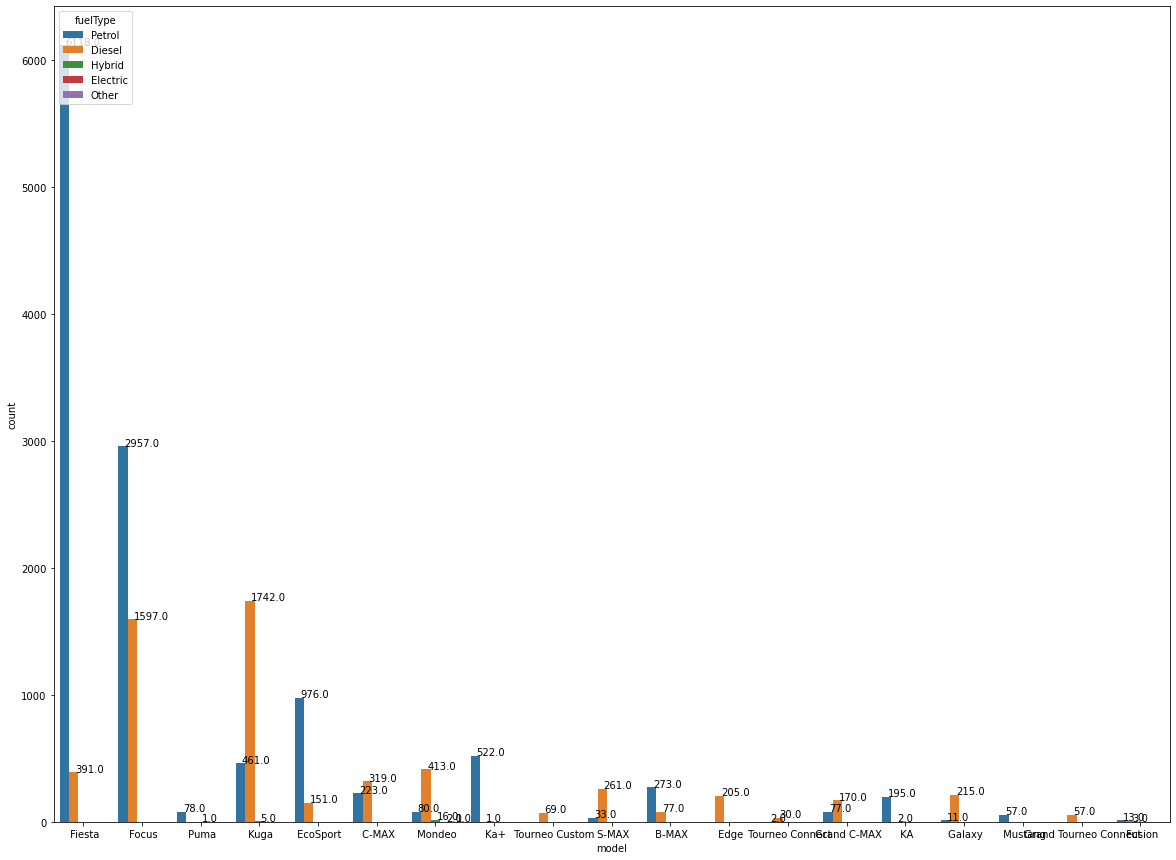

In [21]:
plt.figure(figsize=(20,15))
ax=sns.countplot(x='model', data=ford,hue='fuelType')
for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+3))

plt.show()

In [22]:
models = ford['model'].unique()
fuel_T = ford['fuelType'].unique()
trans = ford['transmission'].unique()


In [23]:
 rows = []
 for x in models:
   for y in fuel_T:
     for z in trans:
       max_Y = np.max(ford['year'][(ford['model'] == x) & (ford['fuelType'] == y) & (ford['transmission'] == z)]) 
       min_Y = np.min(ford['year'][(ford['model'] == x) & (ford['fuelType'] == y) & (ford['transmission'] == z)])
       if math.isnan(max_Y) or math.isnan(min_Y):
         continue
       rows.append([x,y,z,int(max_Y),int(min_Y)])
 pd.DataFrame(rows,columns=["model","fuel","transmission","l_manufac", "f_manufac"]).head()  

,model,fuel,transmission,l_manufac,f_manufac
0,Fiesta,Petrol,Automatic,2060,2008
1,Fiesta,Petrol,Manual,2020,1998
2,Fiesta,Petrol,Semi-Auto,2020,2013
3,Fiesta,Diesel,Manual,2019,2006
4,Focus,Petrol,Automatic,2020,2005


# ford Adavance analysis

In [24]:
ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [25]:
# ln Transform price variable
ford['price'] = np.log(ford['price'])

In [26]:
model_ohe = pd.get_dummies(ford.model)
model_ohe.head()

,B-MAX,C-MAX,EcoSport,Edge,Fiesta,Focus,Fusion,Galaxy,Grand C-MAX,Grand Tourneo Connect,KA,Ka+,Kuga,Mondeo,Mustang,Puma,S-MAX,Tourneo Connect,Tourneo Custom
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
transmission_ohe = pd.get_dummies(ford.transmission)
transmission_ohe.head()

,Automatic,Manual,Semi-Auto
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [28]:
fuel_ohe = pd.get_dummies(ford.fuelType)
fuel_ohe.head()

,Diesel,Electric,Hybrid,Other,Petrol
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [29]:
df = ford.copy(deep=True)

In [30]:
df = df.drop(['model','transmission','fuelType'],axis = 1)

In [31]:
df.shape

(17804, 6)

In [32]:
df = pd.concat([df,model_ohe,transmission_ohe,fuel_ohe],axis=1)
df.head()

,year,price,mileage,tax,mpg,engineSize,B-MAX,C-MAX,EcoSport,Edge,...,Tourneo Connect,Tourneo Custom,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,2017,9.392662,15944,150,57.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,9.546813,9083,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,9.472705,12456,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,9.769956,10460,145,40.3,1.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,9.711116,1482,145,48.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [33]:
!pip install scikit-learn

In [34]:
#spliting data set
from sklearn.model_selection import train_test_split
x = df.drop(['price'],axis=1)
y = df[['price']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [35]:
x_train.head()

,year,mileage,tax,mpg,engineSize,B-MAX,C-MAX,EcoSport,Edge,Fiesta,...,Tourneo Connect,Tourneo Custom,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
152,2016,29900,0,74.3,1.5,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6358,2017,29478,145,74.3,1.5,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3945,2017,27914,150,57.7,1.2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13481,2012,69575,30,55.4,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17246,2012,108822,200,47.1,2.0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [36]:
#normalize data 

from sklearn.preprocessing import  MinMaxScaler
minmax = MinMaxScaler()
normalized_x_train = pd.DataFrame(minmax.fit_transform(x_train) ,columns = x_train.columns)

normalized_x_test = pd.DataFrame(minmax.transform(x_test) ,columns = x_test.columns)

# save the model
dump(minmax, open('ford_scaler.pkl', 'wb'))

In [37]:
normalized_x_train.head()

,year,mileage,tax,mpg,engineSize,B-MAX,C-MAX,EcoSport,Edge,Fiesta,...,Tourneo Connect,Tourneo Custom,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
0,0.290323,0.198008,0.000000,0.295580,0.30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.306452,0.195213,0.250000,0.295580,0.30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.306452,0.184856,0.258621,0.203867,0.24,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.225806,0.460758,0.051724,0.191160,0.20,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.225806,0.720674,0.344828,0.145304,0.40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [38]:
web_table = x_train.iloc[[1],:].copy()
web_table.columns = web_table.columns.str.replace(' ', '')
for x in web_table.columns:
    web_table[x]= 0
    
#save the table
web_table.to_pickle("ford_table.pkl")

In [39]:
web_table

,year,mileage,tax,mpg,engineSize,B-MAX,C-MAX,EcoSport,Edge,Fiesta,...,TourneoConnect,TourneoCustom,Automatic,Manual,Semi-Auto,Diesel,Electric,Hybrid,Other,Petrol
6358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
linreg.fit(normalized_x_train,y_train,)

# save the model
dump(linreg, open('ford_model.pkl', 'wb'))


print ("iNTERCEPT : ",linreg.intercept_)
print ("CO-EFFICIENT : ",linreg.coef_)
print("\n")
y_pred = linreg.predict(normalized_x_test)

from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

iNTERCEPT :  0.0
CO-EFFICIENT :  [[ 6.70455912 -0.95768861 -0.07935039 -0.3490305   1.08769318  0.44219086
   0.55561341  0.59529316  1.06927518  0.50775422  0.68781679  0.20199602
   0.97783379  0.63677426  0.81306422  0.15721403  0.17281886  0.79936371
   0.70362801  0.71565332  0.90042751  0.9683672   0.73538086  0.97384744
   4.21576649  4.17339361  4.22515275  2.41830964  2.52707805  2.65715941
   2.55275253  2.45901321]]


R-Square Value 0.9013704343060343
mean_absolute_error : 0.09667822256627893
mean_squared_error :  0.015810647193717307
root_mean_squared_error :  0.12574039602974577


In [41]:
# build a linear Ridge model
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ridgeregcv = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv,fit_intercept=False)
# fit model
ridgeregcv.fit(normalized_x_train, y_train)
# summarize chosen configuration
print('alpha: %f' % ridgeregcv.alpha_,"\n")


# predict method uses the best alpha value
y_pred = ridgeregcv.predict(normalized_x_test)

# calculate R^2 value, MAE, MSE, RMSE
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

G:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.7944e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
G:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.85891e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
G:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.45006e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
G:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.56733e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
G:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.61984e-19): result may n

alpha: 0.010000 

R-Square Value 0.9013514472757721
mean_absolute_error : 0.09668649865673606
mean_squared_error :  0.015813690877775125
root_mean_squared_error :  0.12575249849515963


In [42]:
from sklearn.linear_model import LassoCV

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
lassoregcv = LassoCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, n_jobs=-1,fit_intercept=False)
# fit model
lassoregcv.fit(normalized_x_train,np.ravel(y_train))



LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        fit_intercept=False, n_jobs=-1)

In [43]:
# summarize chosen configuration
print('alpha: %f' % lassoregcv.alpha_)
print(len(lassoregcv.coef_))

alpha: 0.010000
32


In [44]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(normalized_x_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
0.8938132772483944

R-Square Value 0.49586192017724484


mean_absolute_error : 0.1573669789901368


mean_squared_error :  0.08081500978852364


root_mean_squared_error :  0.28427980897088634


0.8938132772483944

In [45]:
from sklearn.linear_model import ElasticNetCV

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,0.0, 1.0, 10.0, 100.0]
elasticnet = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1,fit_intercept=False,tol=10,max_iter=10**5)

elasticnet = elasticnet.fit(normalized_x_train,y_train)

# summarize chosen configuration
print('alpha: %f' % elasticnet.alpha_)
print('l1_ratio_: %f' % elasticnet.l1_ratio_)

G:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate

alpha: 0.000000
l1_ratio_: 0.470000


G:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1714: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
G:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


In [46]:
# summarize chosen configuration
print('alpha: %f' % elasticnet.alpha_)
print('l1_ratio_: %f' % elasticnet.l1_ratio_)
print(len(elasticnet.coef_))

alpha: 0.000000
l1_ratio_: 0.470000
32


In [47]:
#predict method uses the best alpha value
y_pred = elasticnet.predict(normalized_x_test)

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value -0.8794006763498132


mean_absolute_error : 0.38759957308097065


mean_squared_error :  0.3012741749426415


root_mean_squared_error :  0.5488844823299721


# further exploration on linear model

In [48]:
y_test_pred = linreg.predict(normalized_x_test)
test_r2 = r2_score(y_test,y_test_pred)
test_mae = metrics.mean_absolute_error(y_test,y_test_pred)
test_mse = metrics.mean_squared_error(y_test,y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
string_score_test =(f"R^2 on test set: {test_r2:.2f} "+f"\nMAE on test set: {test_mae:.2f} "+
               f"\nMSE on test set: {test_mse:.2f}"+f"\nRMSE on test set: {test_rmse:.2f}")



y_train_pred = linreg.predict(normalized_x_train)
train_r2 = r2_score(y_train,y_train_pred)
train_mae = metrics.mean_absolute_error(y_train,y_train_pred)
train_mse = metrics.mean_squared_error(y_train,y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
string_score_train =(f"R^2 on train set: {train_r2:.2f}"+f"\nMAE on train set: {train_mae:.2f}"+
               f"\nMSE on train set: {train_mse:.2f}"+f"\nRMSE on train set: {train_rmse:.2f}")


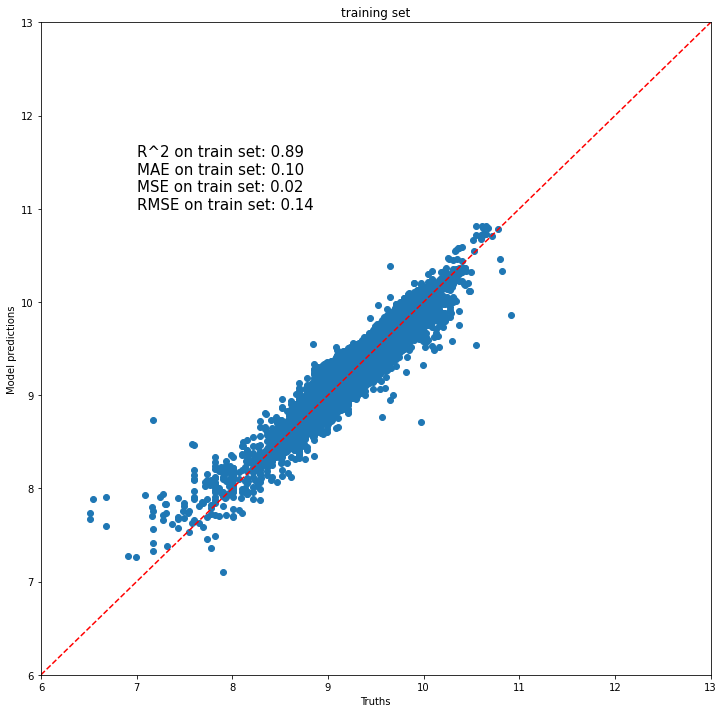

In [49]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.scatter(y_train, y_train_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(7, 11, string_score_train,fontsize=15)
plt.title("training set")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([6,13 ])
_ = plt.ylim([6, 13])


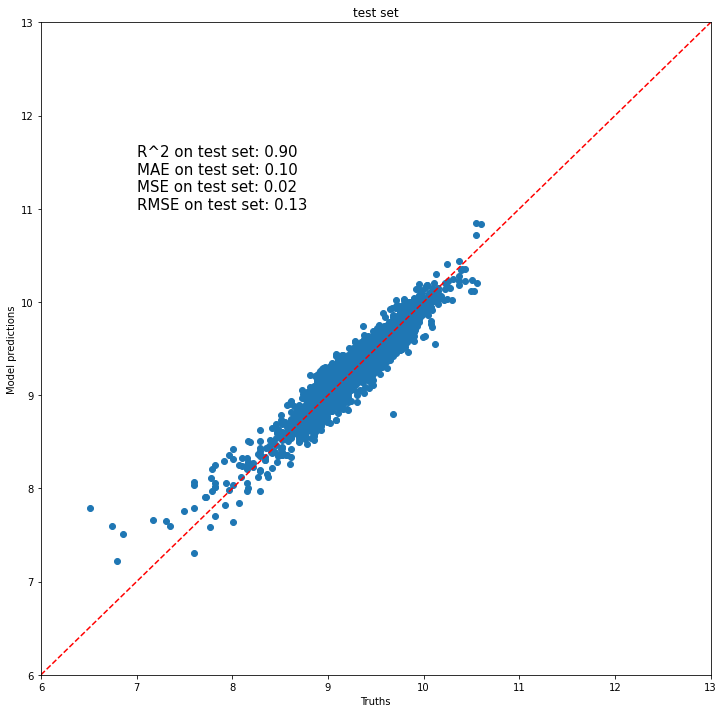

In [50]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.scatter(y_test, y_test_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(7, 11, string_score_test,fontsize=15)
plt.title("test set")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([6,13 ])
_ = plt.ylim([6, 13])

In [51]:
coef_table = pd.DataFrame({'variable':list(normalized_x_train.columns)}).copy()
coef_table.insert(len(coef_table.columns),"Coeffecient",linreg.coef_.transpose())
coef_table = coef_table.set_index('variable')
coef_table

,Coeffecient
variable,
year,6.704559
mileage,-0.957689
tax,-0.079350
mpg,-0.349031
engineSize,1.087693
B-MAX,0.442191
C-MAX,0.555613
EcoSport,0.595293
Edge,1.069275


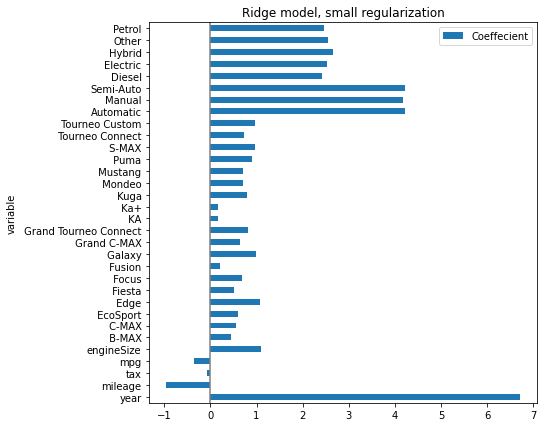

In [52]:
coef_table.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

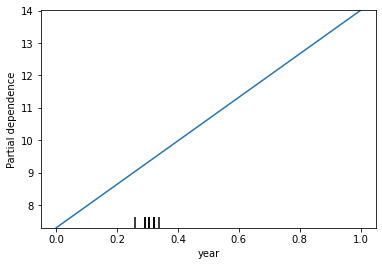

In [53]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(linreg, normalized_x_train, ['year'])